In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow as pa
import datasets
import mutagen
from mutagen.wave import WAVE
from datasets import load_dataset
from scipy.fft import fft,fftfreq

c:\Users\Samir\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
def get_length(path, type):
    audio = WAVE(f'C:\\Users\\Samir\\Documents\\GitHub\\Projet-STT-3795\\src\\data\\wav_files\\{type}\\' + path)
    audio_info = audio.info
    return audio_info.length

train_df = pd.read_csv('C:\\Users\\Samir\\Documents\\GitHub\\Projet-STT-3795\\src\\data\\wav_files\\train\\train_data.csv')
train_df['Length'] = train_df['paths'].apply(lambda x: get_length(x, 'train'))

test_df = pd.read_csv('C:\\Users\\Samir\\Documents\\GitHub\\Projet-STT-3795\\src\\data\\wav_files\\test\\test_data.csv')
test_df['Length'] = test_df['paths'].apply(lambda x: get_length(x, 'test'))

validation_df = pd.read_csv('C:\\Users\\Samir\\Documents\\GitHub\\Projet-STT-3795\\src\\data\\wav_files\\validation\\validation_data.csv')
validation_df['Length'] = validation_df['paths'].apply(lambda x: get_length(x, 'validation'))

In [22]:
train_df

,Unnamed: 0,sentence,age,gender,language,paths,Length
0,0,عليك أن تفي بوعدك.,twenties,male,Arabic,common_voice_ar_20401372.wav,3.096
1,1,يشبه أباه.,twenties,female,Arabic,common_voice_ar_19216539.wav,2.400
2,2,لن يُغَيِّرَ ذلك شيئًا.,fourties,male,Arabic,common_voice_ar_19375914.wav,2.784
3,3,كيف حال الجميع ؟,not_defined,not_defined,Arabic,common_voice_ar_19220386.wav,2.496
4,4,أتعرف كيف تلعب الشطرنج ؟,not_defined,not_defined,Arabic,common_voice_ar_19803329.wav,3.816
...,...,...,...,...,...,...,...
22189,22189,Pa mor bell ydy hi i Lundain?,not_defined,not_defined,Welsh,common_voice_cy_17767322.wav,5.088
22190,22190,Roedd yn gyffrous medru gweld y bwyd yn cael e...,fifties,male,Welsh,common_voice_cy_19644804.wav,7.896
22191,22191,Yr oedd ein hystafell yn un o'r rhai mwyaf cys...,teens,male,Welsh,common_voice_cy_22357372.wav,7.512
22192,22192,"Dim ots, gwaith dros dro yw'r recordio.",not_defined,not_defined,Welsh,common_voice_cy_18665992.wav,5.760


C:\Users\Samir\AppData\Local\Temp\ipykernel_45488\2879399916.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='language', y='Length', data=new_train_df, ci=None)


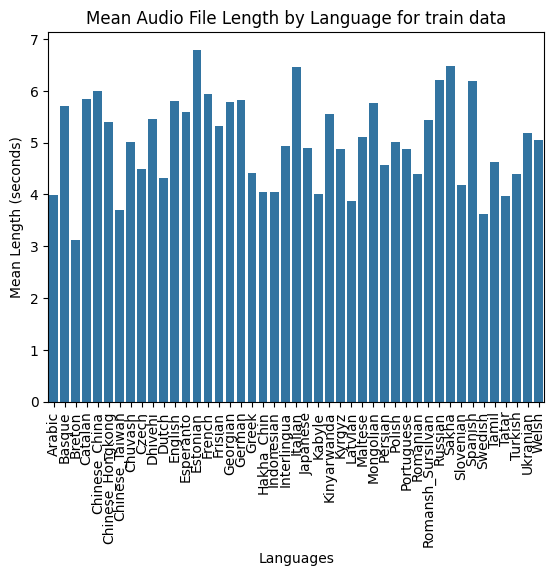

In [72]:
new_train_df = train_df[['language', 'Length']].groupby('language').mean()
sns.barplot(x='language', y='Length', data=new_train_df, ci=None)
plt.title('Mean Audio File Length by Language for train data')
plt.xlabel('Languages')
plt.ylabel('Mean Length (seconds)')
plt.xticks(rotation=90)
plt.show()

In [ ]:
test_df

C:\Users\Samir\AppData\Local\Temp\ipykernel_45488\3235348851.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='language', y='Length', data=new_test_data, ci=None)


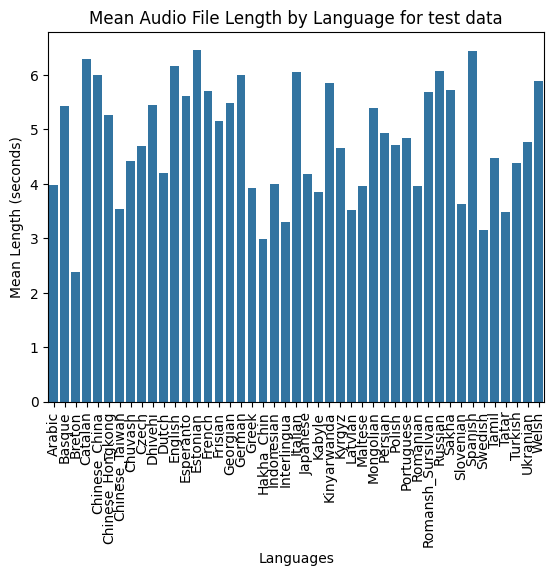

In [71]:
new_test_data = test_df[['language', 'Length']].groupby('language').mean()
sns.barplot(x='language', y='Length', data=new_test_data, ci=None)
plt.title('Mean Audio File Length by Language for test data')
plt.xlabel('Languages')
plt.ylabel('Mean Length (seconds)')
plt.xticks(rotation=90)
plt.show()

In [ ]:
validation_df

C:\Users\Samir\AppData\Local\Temp\ipykernel_45488\2896732816.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='language', y='Length', data=new_validation_data, ci=None)


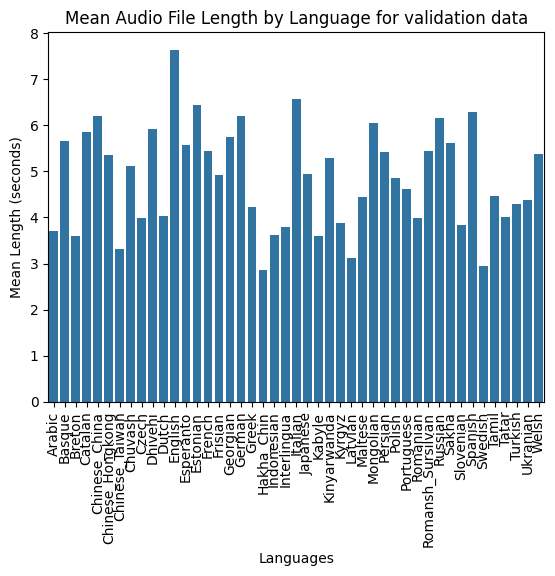

In [73]:
new_validation_data = validation_df[['language', 'Length']].groupby('language').mean()
sns.barplot(x='language', y='Length', data=new_validation_data, ci=None)
plt.title('Mean Audio File Length by Language for validation data')
plt.xlabel('Languages')
plt.ylabel('Mean Length (seconds)')
plt.xticks(rotation=90)
plt.show()